# Lab4 - Training Deep Neural Network
- Nattapat Yuvasuta, 59070501028
- Niti     Buesamae, 59070501047

Name your file to 59_1028_1047.ipynb

## Lab Instruction 

In this lab, you will learn to train a deep fully-connect neural network using Keras library with Tensorflow backend. We will use MNIST data which is a Keras build-in dataset. 

See http://yann.lecun.com/exdb/mnist

**Note:**
Before doing any machine learning/deep learning project, you have to think about the following thing:
1. What is your problem and your data?
- What type of problem do you want to solve? What is your data? What are you trying to predict? Does your data have enough information for your model to predict the expected output?

2. How do you measure your success?
- What do you mean by good model performance? How do you know that your model is ready to be deploy?
- Accuracy? Precision and recall? profit gain? ROC AUC?

3. What is your evaluation method?
- Hold-out method? CV? Iterate CV?

4. How to preprocess your data before fed into a model?

5. What is your baseline? What is a model structure? how does your last layer look like? What is your loss function? What is your optimization function? 

6. Develop a overfit model to figure out how big a model you need by
6.1 Add more layer
6.2 Make layer bigger
6.3 Train more epochs

7. Tune your model to balance the model performance between underfit and overfit (optimization vs generalization)

First, import all important library to this project.

In [2]:
import keras
import numpy as np

C:\Users\Nz-zero\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 1. Load MNIST data

In [2]:
from keras.datasets import mnist

### Load Data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

Learn more about the data. For example:
- The distribution of a target class. 
- The characteristic of the input data. How does it looklike? 
- etc.

In [3]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


In [4]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

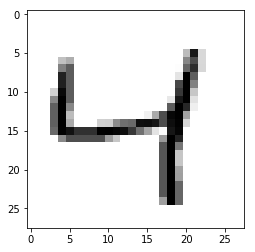

In [6]:
digit = train_images[2]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit,cmap=plt.cm.binary)

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 2. Preprocess a data

In [8]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [10]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [11]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
from keras.utils import to_categorical
# use one-hot line
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 3. Build a model 
Using `Sequential()`, build a five-fully connect layer with 128 neuron each, *elu* as an activation function, and *he_initialier* as a weight initialier function. 
The output is a probability of each target class. We will use *Adam optimizer* with the *cross-entropy loss function*.

In [14]:
from keras import models
from keras import layers

In [15]:
network = models.Sequential()

In [16]:
network.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,)))
network.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal'))

In [17]:
network.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### 4. Train the model

We will train a total of 10 epoch and a batch size of 128. 

To prevent an information leak to test set, which casue an overfit, we will split the data to train set, test set, and validation set. Doing so, we will split the training data into 90% train set and 10% validation set.

Since keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be equally distributed in validation set. Thus, we have to use `train_test_split`  from sklearn to split the data into train set and validation set. 

In [18]:
from sklearn.model_selection import train_test_split

### Split data ###
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.10, random_state=42) 
##################

In [19]:
### Fit the model ###
history = network.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test, y_test))
#####################

Train on 54000 samples, validate on 6000 samples
Epoch 1/10


InternalError: Blas GEMM launch failed : a.shape=(128, 784), b.shape=(784, 128), m=128, n=128, k=784
	 [[{{node dense_1/MatMul}} = MatMul[T=DT_FLOAT, _class=["loc:@training/Adam/gradients/dense_1/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_95, dense_1/kernel/read)]]
	 [[{{node metrics/acc/Mean/_119}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_710_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [20]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [21]:
# The function argument is a record or history of the model during training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

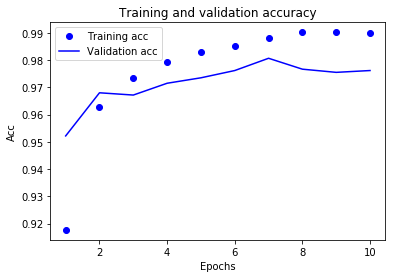

In [22]:
plot_acc_fn(history)

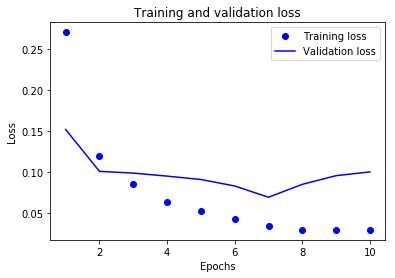

In [23]:
plot_loss_fn(history)

### 5. Evalute the model

Think of the metric that you want to evaluate/measure the performance of your model that can answer the following questions:
- The model is overfit or underfit.
- At which epoch/iteration that it converge or the model become overfit.
- How does the model perform on each data class. What is an overall performace of your model?

In [24]:
### Evaluate the model ###
train_loss, train_acc = network.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s' % (train_loss,train_acc))
##########################

60000/60000 [==============================] - 2s 32us/step
Train Loss: 0.033339361066004006
Train Accuracy: 0.9892833333333333


In [25]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 0s 33us/step
Test Loss: 0.0967126220206279
Test Accuracy: 0.9734


In [26]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

### evaluate your model ###
print("Training----------")
yhat_train = network.predict(train_images)
yhat_train = np.argmax(yhat_train,axis = 1)
yhat_train2 = np.argmax(train_labels,axis = 1)

print(classification_report(yhat_train2, yhat_train))
print(confusion_matrix(yhat_train2, yhat_train))
print("Testing----------")
yhat_test = network.predict(test_images)
yhat_test = np.argmax(yhat_test,axis = 1)
yhat_test2 = np.argmax(test_labels,axis = 1)

print(classification_report(yhat_test2, yhat_test))
print(confusion_matrix(yhat_test2, yhat_test))

Training----------
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      5923
          1       1.00      0.99      1.00      6742
          2       0.99      0.98      0.99      5958
          3       0.99      0.99      0.99      6131
          4       1.00      0.98      0.99      5842
          5       0.99      0.99      0.99      5421
          6       1.00      0.98      0.99      5918
          7       0.98      1.00      0.99      6265
          8       0.97      1.00      0.98      5851
          9       0.98      0.99      0.99      5949

avg / total       0.99      0.99      0.99     60000

[[5873    0    7    5    1    5   10    1    9   12]
 [   0 6700    8    4    2    2    0   12   12    2]
 [   2    1 5831   16   11    2    2   54   31    8]
 [   0    0   16 6075    0    7    0   13   19    1]
 [   0    3    0    0 5745    6    4   12    2   70]
 [   2    0    1   30    1 5363    4    2   17    1]
 [   7    1    0    2   

### Answer
It Over fitting<br>
At third epoch the model started to overfitting because the validation accuracy started to be lower than the training accuracy.<br>
From Confusion Matrix and classification report based on test set<br>
0 : good<br>
1 : good<br>
2 : seems to be a little bit confuse with number 3<br>
3 : good<br>
4 : seems to be a little bit confuse with number 9<br>
5 : quite good with a little bit confusing<br>
6 : quite good with a little bit confusing<br>
7 : good<br>
8 : seems to be a little bit confuse with number 3<br>
9 : quite good with a little bit confusing<br>
Overall : quite good but it's overfitting from graph<br>


### 6. Tune the model 

Try to tune your model by: 
1. Try Increasing epoch and see how it affect your model? Does the result better or it get overfit?
2. Apply an early stop. What is the result do you get?
4. Try adding regularizer l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try to add dropout (any dropout rate) with every layer. How does it affect your model? Does it help reduce overfit?

*Discuss the result from these step in the discssion section*

After try above step, **try to achive the highest precision** by tuning the model using what you had aleady learn in the class.
You can try to change the structure of the model by increase or decrease the layer and neuron node in each layer. (Use only fully-connect layer, don't use other type of layer yet!)

You can also try to do a data augmentation.

**The current highest precision of MNIST model is around 99.8%** ( Just try as must as possible, don't worry if you don't achieve this number of precision.)

**Write  down what are you doing and why in each tuning step**

<b>--> add more epochs from 10 to 20 to see if the number of epoch is going to affect to our model</b>

In [27]:
network_0 = models.Sequential()

In [28]:
network_0.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,)))
network_0.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_0.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_0.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_0.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal'))

In [29]:
network_0.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [30]:
img_train, img_test, lbl_train, lbl_test = train_test_split(train_images, train_labels, test_size=0.10, random_state=42) 

In [31]:
history_0 = network_0.fit(img_train,lbl_train,epochs=20,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 44us/step - loss: 0.2738 - acc: 0.9182 - val_loss: 0.1534 - val_acc: 0.9533
Epoch 2/20
54000/54000 [==============================] - 2s 36us/step - loss: 0.1181 - acc: 0.9634 - val_loss: 0.1024 - val_acc: 0.9693
Epoch 3/20
54000/54000 [==============================] - 2s 37us/step - loss: 0.0833 - acc: 0.9736 - val_loss: 0.0897 - val_acc: 0.9705
Epoch 4/20
54000/54000 [==============================] - 2s 40us/step - loss: 0.0671 - acc: 0.9781 - val_loss: 0.0797 - val_acc: 0.9773
Epoch 5/20
54000/54000 [==============================] - 2s 36us/step - loss: 0.0527 - acc: 0.9831 - val_loss: 0.0846 - val_acc: 0.9767
Epoch 6/20
54000/54000 [==============================] - 2s 36us/step - loss: 0.0444 - acc: 0.9852 - val_loss: 0.0767 - val_acc: 0.9788
Epoch 7/20
54000/54000 [==============================] - 2s 36us/step - loss: 0.0371 - acc: 0.9876 - val_loss: 0.0740 - val_acc:

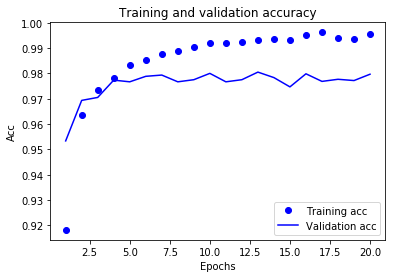

In [32]:
plot_acc_fn(history_0)

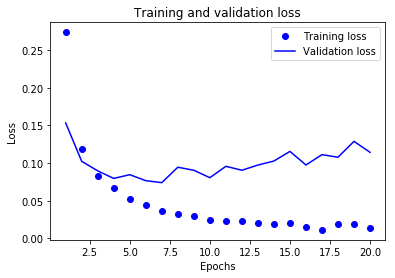

In [33]:
plot_loss_fn(history_0)

<b>--> add more epochs from 20 to 40 to see if the number of epoch is going to affect to our model</b>

In [34]:
network_1 = models.Sequential()

In [35]:
network_1.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,)))
network_1.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_1.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_1.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_1.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal'))

In [36]:
network_1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [37]:
img_train, img_test, lbl_train, lbl_test = train_test_split(train_images, train_labels, test_size=0.10, random_state=42) 

In [38]:
history_1 = network_1.fit(img_train,lbl_train,epochs=40,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 3s 48us/step - loss: 0.2749 - acc: 0.9164 - val_loss: 0.1342 - val_acc: 0.9595
Epoch 2/40
54000/54000 [==============================] - 2s 43us/step - loss: 0.1211 - acc: 0.9628 - val_loss: 0.1035 - val_acc: 0.9688
Epoch 3/40
54000/54000 [==============================] - 2s 40us/step - loss: 0.0847 - acc: 0.9734 - val_loss: 0.0916 - val_acc: 0.9723
Epoch 4/40
54000/54000 [==============================] - 2s 39us/step - loss: 0.0676 - acc: 0.9784 - val_loss: 0.0818 - val_acc: 0.9755
Epoch 5/40
54000/54000 [==============================] - 2s 40us/step - loss: 0.0529 - acc: 0.9829 - val_loss: 0.0815 - val_acc: 0.9757
Epoch 6/40
54000/54000 [==============================] - 2s 39us/step - loss: 0.0452 - acc: 0.9855 - val_loss: 0.0912 - val_acc: 0.9735
Epoch 7/40
54000/54000 [==============================] - 2s 38us/step - loss: 0.0365 - acc: 0.9880 - val_loss: 0.0849 - val_acc:

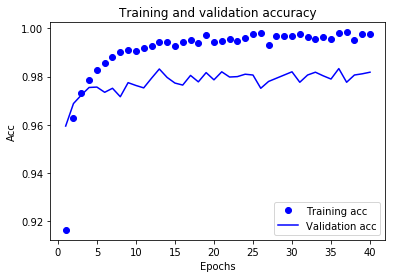

In [39]:
plot_acc_fn(history_1)

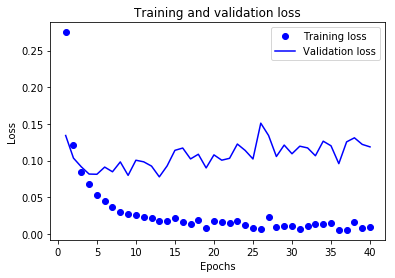

In [40]:
plot_loss_fn(history_1)

Early Stop

<b> --> to see if the early stop function really stop on second epoch that we observe from above which is the point that the mode start to overfit </b>

In [41]:
from keras.callbacks import EarlyStopping
callbacks = [
        EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None)
]
history_es = network_1.fit(img_train,lbl_train,epochs=10,batch_size=128,validation_data=(img_test, lbl_test),callbacks=callbacks)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0077 - acc: 0.9979 - val_loss: 0.1406 - val_acc: 0.9767
Epoch 2/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0089 - acc: 0.9973 - val_loss: 0.1509 - val_acc: 0.9777


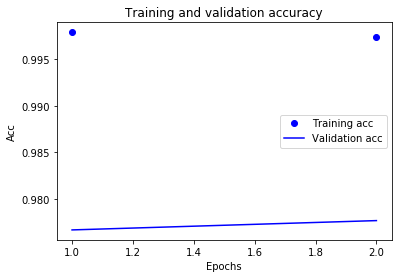

In [42]:
plot_acc_fn(history_es)

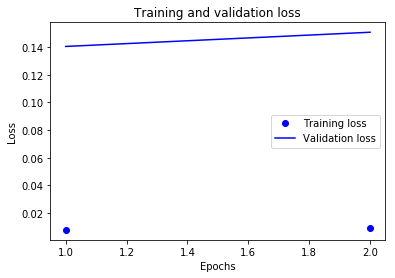

In [43]:
plot_loss_fn(history_es)

Regularize l1 and l2

<b>--> Test on l1 Regilarizer to see if it prevent the model from overfitting</b>

In [44]:
from keras import regularizers
network_2 = models.Sequential()

In [45]:
network_2.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,),
                           kernel_regularizer=regularizers.l1(0.01)))
network_2.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal', 
                           kernel_regularizer=regularizers.l1(0.01)))
network_2.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal', 
                           kernel_regularizer=regularizers.l1(0.01)))
network_2.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal', 
                           kernel_regularizer=regularizers.l1(0.01)))
network_2.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal',
                           kernel_regularizer=regularizers.l1(0.01)))

In [46]:
network_2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [47]:
history_rl = network_2.fit(img_train,lbl_train,epochs=10,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 63us/step - loss: 16.6852 - acc: 0.4164 - val_loss: 2.4895 - val_acc: 0.2398
Epoch 2/10
54000/54000 [==============================] - 2s 44us/step - loss: 2.3311 - acc: 0.3079 - val_loss: 2.2205 - val_acc: 0.3727
Epoch 3/10
54000/54000 [==============================] - 2s 42us/step - loss: 2.1387 - acc: 0.4473 - val_loss: 2.0388 - val_acc: 0.5178
Epoch 4/10
54000/54000 [==============================] - 2s 45us/step - loss: 1.9789 - acc: 0.5357 - val_loss: 1.9391 - val_acc: 0.5360
Epoch 5/10
54000/54000 [==============================] - 2s 43us/step - loss: 1.8994 - acc: 0.5531 - val_loss: 1.8741 - val_acc: 0.5598
Epoch 6/10
54000/54000 [==============================] - 2s 43us/step - loss: 1.8622 - acc: 0.5686 - val_loss: 1.8376 - val_acc: 0.5748
Epoch 7/10
54000/54000 [==============================] - 2s 41us/step - loss: 1.8374 - acc: 0.5750 - val_loss: 1.8276 - val_acc

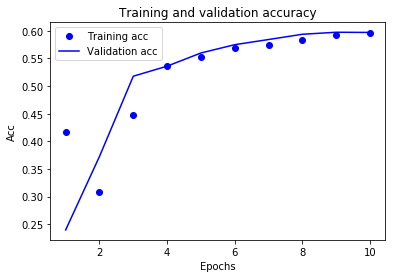

In [48]:
plot_acc_fn(history_rl)

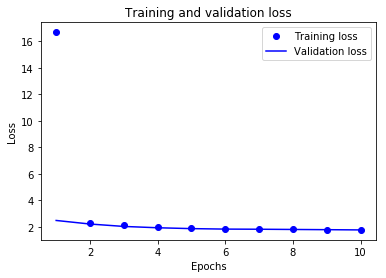

In [49]:
plot_loss_fn(history_rl)

<b>--> Test on l2 Regilarizer to see if it prevent the model from overfitting</b>

In [50]:
network_2_1 = models.Sequential()

In [51]:
network_2_1.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,),
                           kernel_regularizer=regularizers.l2(0.01)))
network_2_1.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal', 
                           kernel_regularizer=regularizers.l2(0.01)))
network_2_1.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal', 
                           kernel_regularizer=regularizers.l2(0.01)))
network_2_1.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal', 
                           kernel_regularizer=regularizers.l2(0.01)))
network_2_1.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal',
                           kernel_regularizer=regularizers.l2(0.01)))

In [52]:
network_2_1.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [53]:
history_rl_2 = network_2_1.fit(img_train,lbl_train,epochs=10,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 53us/step - loss: 3.4559 - acc: 0.8800 - val_loss: 1.1049 - val_acc: 0.8927
Epoch 2/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.9807 - acc: 0.8923 - val_loss: 0.9444 - val_acc: 0.8880
Epoch 3/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.9168 - acc: 0.8915 - val_loss: 0.8811 - val_acc: 0.8998
Epoch 4/10
54000/54000 [==============================] - 2s 42us/step - loss: 0.8871 - acc: 0.8970 - val_loss: 0.8664 - val_acc: 0.9033
Epoch 5/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.8758 - acc: 0.9001 - val_loss: 0.8733 - val_acc: 0.9027
Epoch 6/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.8672 - acc: 0.9036 - val_loss: 0.8607 - val_acc: 0.9028
Epoch 7/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.8620 - acc: 0.9060 - val_loss: 0.8488 - val_acc:

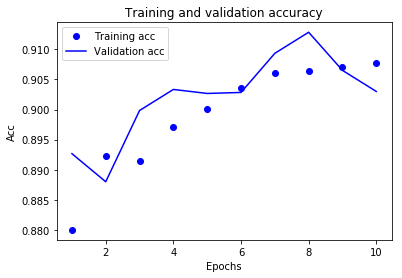

In [54]:
plot_acc_fn(history_rl_2)

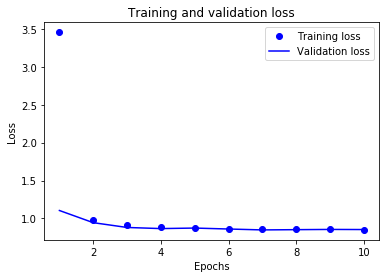

In [55]:
plot_loss_fn(history_rl_2)

<b>--> Test on various dropout value to find the closest value of a optimal value of dropout </b>

In [56]:
#dropout rate at 20%
from keras.layers import Dropout
network_3 = models.Sequential()

In [57]:
network_3.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,)))
network_3.add(Dropout(0.2))
network_3.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_3.add(Dropout(0.2))
network_3.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_3.add(Dropout(0.2))
network_3.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_3.add(Dropout(0.2))
network_3.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal'))

In [58]:
network_3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [59]:
history_do = network_3.fit(img_train,lbl_train,epochs=20,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 70us/step - loss: 0.4575 - acc: 0.8574 - val_loss: 0.1840 - val_acc: 0.9397
Epoch 2/20
54000/54000 [==============================] - 3s 53us/step - loss: 0.2575 - acc: 0.9220 - val_loss: 0.1407 - val_acc: 0.9547
Epoch 3/20
54000/54000 [==============================] - 3s 56us/step - loss: 0.2043 - acc: 0.9391 - val_loss: 0.1186 - val_acc: 0.9625
Epoch 4/20
54000/54000 [==============================] - 3s 53us/step - loss: 0.1760 - acc: 0.9463 - val_loss: 0.1024 - val_acc: 0.9667
Epoch 5/20
54000/54000 [==============================] - 3s 55us/step - loss: 0.1533 - acc: 0.9519 - val_loss: 0.0890 - val_acc: 0.9727
Epoch 6/20
54000/54000 [==============================] - 3s 59us/step - loss: 0.1401 - acc: 0.9560 - val_loss: 0.0879 - val_acc: 0.9745
Epoch 7/20
54000/54000 [==============================] - 3s 54us/step - loss: 0.1298 - acc: 0.9598 - val_loss: 0.0814 - val_acc:

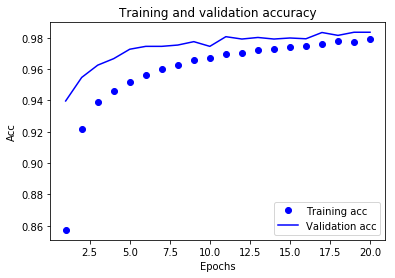

In [60]:
plot_acc_fn(history_do)

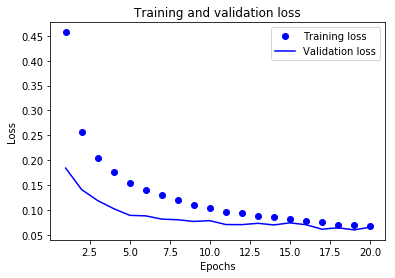

In [61]:
plot_loss_fn(history_do)

In [62]:
#dropout rate at 50%
network_4 = models.Sequential()

In [63]:
network_4.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,)))
network_4.add(Dropout(0.5))
network_4.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_4.add(Dropout(0.5))
network_4.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_4.add(Dropout(0.5))
network_4.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_4.add(Dropout(0.5))
network_4.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal'))

In [64]:
network_4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [65]:
history_do_1 = network_4.fit(img_train,lbl_train,epochs=20,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 93us/step - loss: 1.2909 - acc: 0.6192 - val_loss: 0.3463 - val_acc: 0.8925
Epoch 2/20
54000/54000 [==============================] - 3s 56us/step - loss: 0.6386 - acc: 0.8060 - val_loss: 0.2836 - val_acc: 0.9163
Epoch 3/20
54000/54000 [==============================] - 3s 55us/step - loss: 0.5111 - acc: 0.8479 - val_loss: 0.2545 - val_acc: 0.9238
Epoch 4/20
54000/54000 [==============================] - 3s 65us/step - loss: 0.4419 - acc: 0.8689 - val_loss: 0.2390 - val_acc: 0.9278
Epoch 5/20
54000/54000 [==============================] - 3s 59us/step - loss: 0.4031 - acc: 0.8832 - val_loss: 0.2278 - val_acc: 0.9295
Epoch 6/20
54000/54000 [==============================] - 3s 64us/step - loss: 0.3760 - acc: 0.8892 - val_loss: 0.2113 - val_acc: 0.9327
Epoch 7/20
54000/54000 [==============================] - 3s 58us/step - loss: 0.3460 - acc: 0.8990 - val_loss: 0.1927 - val_acc:

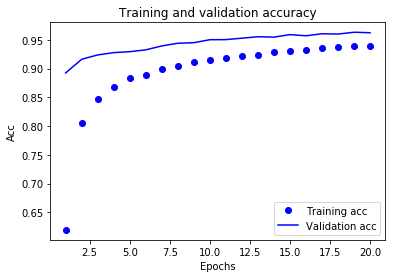

In [66]:
plot_acc_fn(history_do_1)

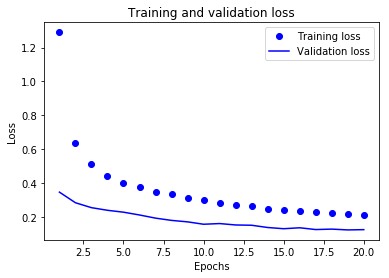

In [67]:
plot_loss_fn(history_do_1)

In [68]:
#dropout rate at 10%
network_5 = models.Sequential()

In [69]:
network_5.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,)))
network_5.add(Dropout(0.1))
network_5.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_5.add(Dropout(0.1))
network_5.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_5.add(Dropout(0.1))
network_5.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal'))
network_5.add(Dropout(0.1))
network_5.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal'))

In [70]:
network_5.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [71]:
history_do_2 = network_5.fit(img_train,lbl_train,epochs=20,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 66us/step - loss: 0.3622 - acc: 0.8892 - val_loss: 0.1568 - val_acc: 0.9513
Epoch 2/20
54000/54000 [==============================] - 3s 53us/step - loss: 0.1883 - acc: 0.9426 - val_loss: 0.1206 - val_acc: 0.9607
Epoch 3/20
54000/54000 [==============================] - 3s 46us/step - loss: 0.1419 - acc: 0.9563 - val_loss: 0.1034 - val_acc: 0.9680
Epoch 4/20
54000/54000 [==============================] - 3s 48us/step - loss: 0.1189 - acc: 0.9634 - val_loss: 0.0877 - val_acc: 0.9713
Epoch 5/20
54000/54000 [==============================] - 3s 53us/step - loss: 0.1026 - acc: 0.9674 - val_loss: 0.0820 - val_acc: 0.9752
Epoch 6/20
54000/54000 [==============================] - 3s 49us/step - loss: 0.0930 - acc: 0.9701 - val_loss: 0.0772 - val_acc: 0.9760
Epoch 7/20
54000/54000 [==============================] - 3s 47us/step - loss: 0.0852 - acc: 0.9721 - val_loss: 0.0743 - val_acc:

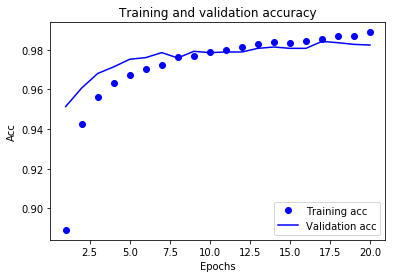

In [72]:
plot_acc_fn(history_do_2)

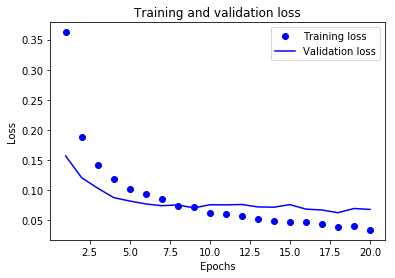

In [73]:
plot_loss_fn(history_do_2)

<b>--> the dropout value = 0.25 seem to be close to the optimal value </b>

In [74]:
#final destination model
network_6 = models.Sequential()

In [75]:
network_6.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,)))
network_6.add(Dropout(0.25))
network_6.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal'))
network_6.add(Dropout(0.25))
network_6.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal'))
network_6.add(Dropout(0.25))
network_6.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal'))
network_6.add(Dropout(0.25))
network_6.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal'))
network_6.add(Dropout(0.25))
network_6.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal'))
network_6.add(Dropout(0.25))
network_6.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal'))

In [76]:
network_6.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [77]:
history_final = network_6.fit(img_train,lbl_train,epochs=20,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 7s 136us/step - loss: 0.5945 - acc: 0.8262 - val_loss: 0.1944 - val_acc: 0.9417
Epoch 2/20
54000/54000 [==============================] - 6s 112us/step - loss: 0.2973 - acc: 0.9116 - val_loss: 0.1545 - val_acc: 0.9567
Epoch 3/20
54000/54000 [==============================] - 6s 117us/step - loss: 0.2385 - acc: 0.9283 - val_loss: 0.1433 - val_acc: 0.9625
Epoch 4/20
54000/54000 [==============================] - 6s 119us/step - loss: 0.2008 - acc: 0.9406 - val_loss: 0.1239 - val_acc: 0.9630
Epoch 5/20
54000/54000 [==============================] - 6s 120us/step - loss: 0.1798 - acc: 0.9468 - val_loss: 0.1134 - val_acc: 0.9643
Epoch 6/20
54000/54000 [==============================] - 5s 98us/step - loss: 0.1633 - acc: 0.9518 - val_loss: 0.1078 - val_acc: 0.9677
Epoch 7/20
54000/54000 [==============================] - 5s 98us/step - loss: 0.1483 - acc: 0.9562 - val_loss: 0.1227 - val

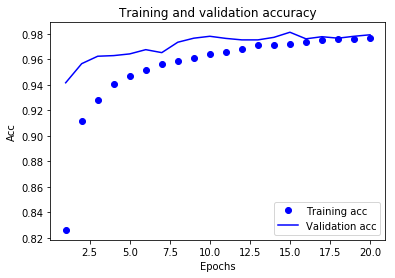

In [78]:
plot_acc_fn(history_final)

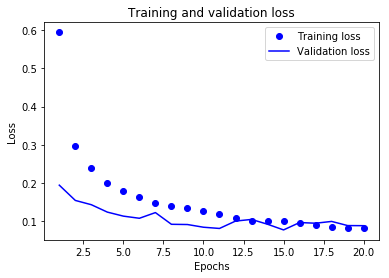

In [79]:
plot_loss_fn(history_final)

<b>--> add more node to increase the accuracy of model, meanwhile the more node,means the more likely that it will be overfit so we increase the drop to 0.35 to compensate the increasing number of node </b>

In [133]:
#test to add more 
network_7 = models.Sequential()

In [134]:
network_7.add(layers.Dense(512, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,)))
network_7.add(Dropout(0.35))
network_7.add(layers.Dense(512, activation='elu',kernel_initializer = 'he_normal'))
network_7.add(Dropout(0.35))
network_7.add(layers.Dense(512, activation='elu',kernel_initializer = 'he_normal'))
network_7.add(Dropout(0.35))
network_7.add(layers.Dense(512, activation='elu',kernel_initializer = 'he_normal'))
network_7.add(Dropout(0.35))
network_7.add(layers.Dense(512, activation='elu',kernel_initializer = 'he_normal'))
network_7.add(Dropout(0.35))
network_7.add(layers.Dense(512, activation='elu',kernel_initializer = 'he_normal'))
network_7.add(Dropout(0.35))
network_7.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal'))

In [135]:
network_7.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [136]:
history_final_1 = network_7.fit(img_train,lbl_train,epochs=20,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 24s 445us/step - loss: 0.7717 - acc: 0.8056 - val_loss: 0.2128 - val_acc: 0.9365
Epoch 2/20
54000/54000 [==============================] - 20s 374us/step - loss: 0.3396 - acc: 0.9039 - val_loss: 0.1941 - val_acc: 0.9388
Epoch 3/20
54000/54000 [==============================] - 24s 437us/step - loss: 0.2750 - acc: 0.9211 - val_loss: 0.1509 - val_acc: 0.9528
Epoch 4/20
54000/54000 [==============================] - 24s 442us/step - loss: 0.2297 - acc: 0.9335 - val_loss: 0.1262 - val_acc: 0.9620
Epoch 5/20
54000/54000 [==============================] - 22s 402us/step - loss: 0.2118 - acc: 0.9390 - val_loss: 0.1128 - val_acc: 0.9653
Epoch 6/20
54000/54000 [==============================] - 22s 402us/step - loss: 0.1997 - acc: 0.9436 - val_loss: 0.1341 - val_acc: 0.9613
Epoch 7/20
54000/54000 [==============================] - 21s 397us/step - loss: 0.1859 - acc: 0.9489 - val_loss: 0.1

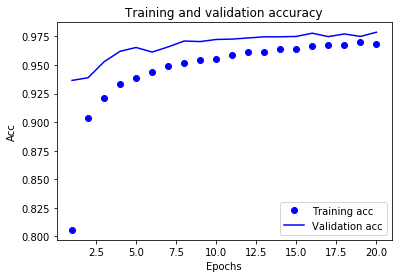

In [137]:
plot_acc_fn(history_final_1)

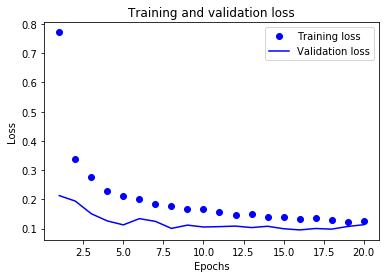

In [138]:
plot_loss_fn(history_final_1)

<b>--> Try to use the dropout along with early stop but it stop  too early that it doesn't find its highest accuracy</b>

In [86]:
from keras import regularizers
network_8 = models.Sequential()

In [87]:
network_8.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,)))
network_8.add(Dropout(0.1))
network_8.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal'))
network_8.add(Dropout(0.1))
network_8.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal'))
network_8.add(Dropout(0.1))
network_8.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal'))
network_8.add(Dropout(0.1))
network_8.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal'))
network_8.add(Dropout(0.1))
network_8.add(layers.Dense(256, activation='elu',kernel_initializer = 'he_normal'))
network_8.add(Dropout(0.1))
network_8.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal'))

In [88]:
network_8.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [89]:
history_final_2 = network_8.fit(img_train,lbl_train,epochs=20,batch_size=128,validation_data=(img_test, lbl_test),callbacks=callbacks)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 7s 137us/step - loss: 0.3355 - acc: 0.8972 - val_loss: 0.1433 - val_acc: 0.9547
Epoch 2/20
54000/54000 [==============================] - 6s 109us/step - loss: 0.1762 - acc: 0.9470 - val_loss: 0.1184 - val_acc: 0.9650
Epoch 3/20
54000/54000 [==============================] - 6s 118us/step - loss: 0.1396 - acc: 0.9569 - val_loss: 0.0906 - val_acc: 0.9720
Epoch 4/20
54000/54000 [==============================] - 6s 116us/step - loss: 0.1141 - acc: 0.9654 - val_loss: 0.0837 - val_acc: 0.9773
Epoch 5/20
54000/54000 [==============================] - 6s 109us/step - loss: 0.1003 - acc: 0.9686 - val_loss: 0.0767 - val_acc: 0.9783
Epoch 6/20
54000/54000 [==============================] - 6s 120us/step - loss: 0.0881 - acc: 0.9725 - val_loss: 0.0814 - val_acc: 0.9770


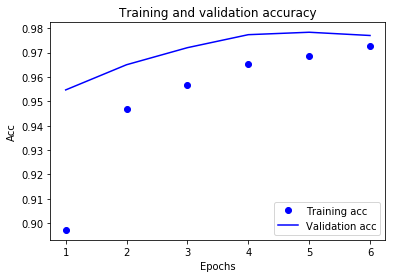

In [90]:
plot_acc_fn(history_final_2)

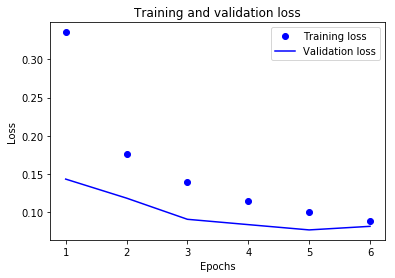

In [91]:
plot_loss_fn(history_final_2)

<b>--> from previous assumption, we assume that need more epoch inorder to get high accuracy but it stuck on accuracy around 79% with a slowly increasing rate of accuracy </b>

In [145]:
network_9 = models.Sequential()

In [146]:
network_9.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal',input_shape=(28*28,),
                           kernel_regularizer=regularizers.l1(0.01)))
network_9.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal', 
                           kernel_regularizer=regularizers.l1(0.01)))
network_9.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal', 
                           kernel_regularizer=regularizers.l1(0.01)))
network_9.add(layers.Dense(128, activation='elu',kernel_initializer = 'he_normal', 
                           kernel_regularizer=regularizers.l1(0.01)))
network_9.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal',
                           kernel_regularizer=regularizers.l1(0.01)))

In [147]:
network_9.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [149]:
history_rl_3 = network_9.fit(img_train,lbl_train,epochs=40,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
54000/54000 [==============================] - 4s 73us/step - loss: 16.5807 - acc: 0.5136 - val_loss: 2.2938 - val_acc: 0.5242
Epoch 2/40
54000/54000 [==============================] - 3s 50us/step - loss: 2.0812 - acc: 0.6064 - val_loss: 1.9628 - val_acc: 0.6555
Epoch 3/40
54000/54000 [==============================] - 2s 45us/step - loss: 1.9281 - acc: 0.6529 - val_loss: 1.8832 - val_acc: 0.6512
Epoch 4/40
54000/54000 [==============================] - 2s 44us/step - loss: 1.8692 - acc: 0.6679 - val_loss: 1.8359 - val_acc: 0.6810
Epoch 5/40
54000/54000 [==============================] - 3s 50us/step - loss: 1.8250 - acc: 0.6804 - val_loss: 1.8044 - val_acc: 0.6935
Epoch 6/40
54000/54000 [==============================] - 3s 50us/step - loss: 1.7782 - acc: 0.6928 - val_loss: 1.7513 - val_acc: 0.7052
Epoch 7/40
54000/54000 [==============================] - 3s 48us/step - loss: 1.7418 - acc: 0.7026 - val_loss: 1.7218 - val_acc

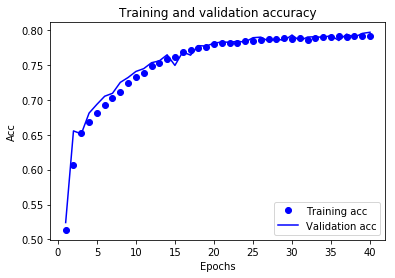

In [150]:
plot_acc_fn(history_rl_3)

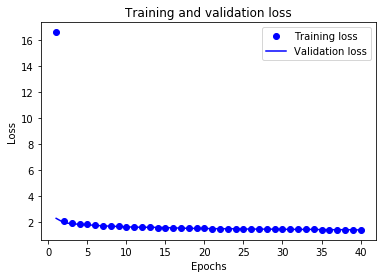

In [151]:
plot_loss_fn(history_rl_3)

### 7. Final Evaluation

After you make sure that your model is good enough to be deploy in application, it is a time to evaluate your model with test set in order to test that your model is generalize well and not overfit to validation set.

In [139]:
train_loss, train_acc = network_7.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s' % (train_loss,train_acc))

60000/60000 [==============================] - 11s 183us/step
Train Loss: 0.05534409236117353
Train Accuracy: 0.9869833333333333


In [154]:
train_loss, train_acc = network_8.evaluate(train_images, train_labels)
print('Train Loss: %s\nTrain Accuracy: %s' % (train_loss,train_acc))

60000/60000 [==============================] - 5s 79us/step
Train Loss: 0.047114322188457784
Train Accuracy: 0.9848


In [140]:
test_loss, test_acc = network_7.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 2s 208us/step
Test Loss: 0.11357019108559326
Test Accuracy: 0.9769


In [155]:
test_loss, test_acc = network_8.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 1s 80us/step
Test Loss: 0.09489086502046266
Test Accuracy: 0.9737


In [94]:
type(test_images)

numpy.ndarray

In [141]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

### evaluate your model ###
print("Training----------")
yhat_train = network_7.predict(train_images)
yhat_train = np.argmax(yhat_train,axis = 1)
yhat_train2 = np.argmax(train_labels,axis = 1)

print(classification_report(yhat_train2, yhat_train))
print(confusion_matrix(yhat_train2, yhat_train))
print("Testing----------")
yhat_test = network_7.predict(test_images)
yhat_test = np.argmax(yhat_test,axis = 1)
yhat_test2 = np.argmax(test_labels,axis = 1)

print(classification_report(yhat_test2, yhat_test))
print(confusion_matrix(yhat_test2, yhat_test))

Training----------
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      5923
          1       0.99      1.00      0.99      6742
          2       0.99      0.99      0.99      5958
          3       0.99      0.98      0.99      6131
          4       0.98      1.00      0.99      5842
          5       0.99      0.98      0.98      5421
          6       0.99      0.99      0.99      5918
          7       0.99      0.98      0.99      6265
          8       0.99      0.98      0.98      5851
          9       0.99      0.97      0.98      5949

avg / total       0.99      0.99      0.99     60000

[[5895    1    2    0    4    3    8    1    5    4]
 [   0 6719    6    0    7    0    2    4    4    0]
 [   8    6 5902   10    9    2    3    3   14    1]
 [   6    8   23 6027    3   16    0    7   31   10]
 [   1    7    3    0 5816    1    2    3    0    9]
 [   6    1    1   39    6 5297   36    5    4   26]
 [  14    2    0    0   

### Result & Discussion 

- Write down the key finding from this lab. Discuss what you had done, what do you get from the output or a result, and why (support your reason)

By increase the epochs, the result will get overfit because it will be more familiar with the training set. <br><br>
By apply an early stop, the training stop at the point where the model started to get overfit which is at epoch 2. <br><br>
By adding l1 regularizer, the model get overfit more difficult than model with no regularizer to punish the high-term polynomial inorder to make the model predict more general rather than to the training set. <br><br> From observation, l2 tends to have a better accuracy at early epoch but l1 will have a better accuracy than l2 by time that a number of epoch increase. <br><br>
By adding dropout to every layer, it seems to help the overfit problem and increase the accuracy because it drop a node with a given probability, too small probability result in high accuracy but overfitted model, too larger with result in lower accuracy meaning the optimal point is somewhere between a two value. In this case, we use 0.25 because it's a half way between 0.1 (high accuracy but overfit) and  0.5 (lower accuracy means that we need more epoch to train which is not garuntee that a model won't overfit).

### 8. Play with your model

1. Use any kind of drawing application ( For example, Paint or Adobe Photoshop ), create a 28x28 pixel (any resolution) with white background and black paint. 
2. Draw 3 any distinct single digit number of a range from 0 - 9. Then save the image (PNG)
3. Install open-cv (See https://pypi.org/project/opencv-python) by 
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)
4. Load your image to this IPython using ```imread()``` function
5. Preprocess as what you did during the development stage.
6. Feed your image to your best model.

What class do your model predict? Does it correct? If not, why do it still get negative result since your model get more than 90% accuracy?

In [96]:
'''from keras.models import load_model
network_4.save('my_model.h5')'''

"from keras.models import load_model\nnetwork_4.save('my_model.h5')"

In [97]:
#use_mode = load_model('my_model.h5')

In [3]:
import cv2
imgloc1 = "3.png" 
imgloc2 = "4.png" 
imgloc3 = "5.png" 
imgloc4 = "8.png" 
imgloc5 = "1.png" 
imgloc6 = "10.png" 
imgloc7 = "5_1.png" 
img = np.array([
        cv2.imread(imgloc1,0),
        cv2.imread(imgloc2,0),
        cv2.imread(imgloc3,0),
        cv2.imread(imgloc4,0),
        cv2.imread(imgloc5,0),
        cv2.imread(imgloc6,0),
        cv2.imread(imgloc7,0)
    ])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

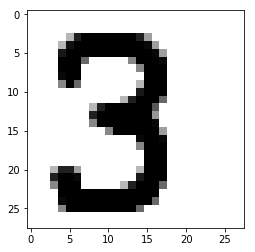

In [274]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[0], cmap=plt.cm.binary)

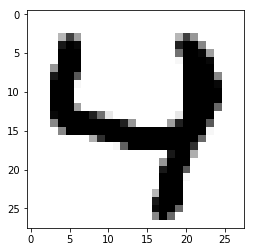

In [158]:
plt.imshow(img[1], cmap=plt.cm.binary)

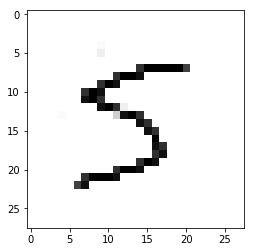

In [159]:
plt.imshow(img[2], cmap=plt.cm.binary)

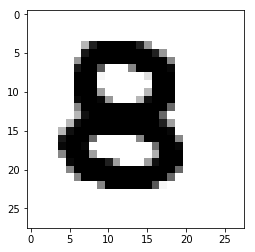

In [160]:
plt.imshow(img[3], cmap=plt.cm.binary)

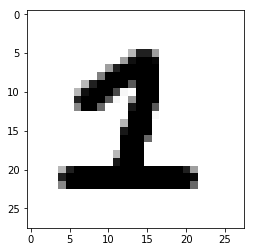

In [161]:
plt.imshow(img[4], cmap=plt.cm.binary)

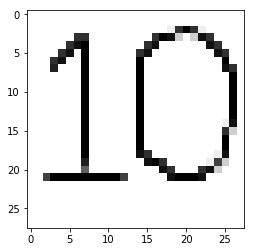

In [162]:
plt.imshow(img[5], cmap=plt.cm.binary)

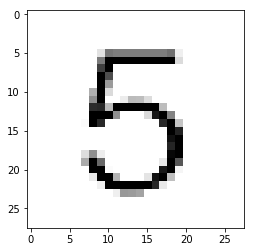

In [172]:
plt.imshow(img[6], cmap=plt.cm.binary)

In [173]:
img.ndim

3

In [174]:
img.shape

(7, 28, 28)

In [176]:
img = img.reshape(7,28*28) # Reshape
img = img.astype('float32')/255 # Normalize

In [177]:
img.shape

(7, 784)

In [178]:
img[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [179]:
y_prob = network_7.predict(img) 
y_classes = y_prob.argmax(axis=-1)

In [180]:
print(y_prob)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.63118867e-13 9.75648598e-14 8.29412927e-11 2.98783186e-11
  9.99994874e-01 2.05733885e-11 2.13425666e-11 4.88530353e-12
  8.06729961e-11 5.12854149e-06]
 [1.73545256e-03 1.51156529e-03 1.14522444e-03 1.20994635e-01
  1.82800218e-02 6.88419700e-01 3.93007183e-03 1.48639164e-03
  6.82078116e-03 1.55676246e-01]
 [4.57759015e-04 1.74585584e-05 1.16066672e-04 8.93975887e-03
  7.93039362e-06 1.32868328e-04 2.85191316e-04 3.27067755e-05
  9.89910185e-01 1.00024627e-04]
 [1.17768462e-08 9.96883690e-01 3.09785735e-03 2.92346681e-06
  1.49372823e-07 2.04764456e-06 4.78720449e-06 3.07726765e-07
  8.14116629e-06 9.21705767e-10]
 [7.85849537e-08 9.42513943e-01 4.07807203e-03 2.08370364e-03
  3.26912364e-08 5.07330447e-02 2.65178987e-05 1.87532780e-08
  5.64547838e-04 1.03296740e-08]
 [1.12834470e-12 2.67821165e-11 6.96323815e-12 4.02356955e

In [181]:
print(y_classes)

[3 4 5 8 1 1 5]


In [275]:
loc0 = "key/0.png" 
loc1 = "key/1.png" 
loc2 = "key/2.png" 
loc3 = "key/3.png" 
loc4 = "key/4.png"  
loc5 = "key/5.png" 
loc6 = "key/6.png"  
loc7 = "key/7.png" 
loc8 = "key/8.png" 
loc9 = "key/9.png"  
image = np.array([
        cv2.imread(loc0,0),
        cv2.imread(loc1,0),
        cv2.imread(loc2,0),
        cv2.imread(loc3,0),
        cv2.imread(loc4,0),
        cv2.imread(loc5,0),
        cv2.imread(loc6,0),
        cv2.imread(loc7,0),
        cv2.imread(loc8,0),
        cv2.imread(loc9,0)
    ])
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [276]:
image.shape

(10, 28, 28)

In [277]:
image = image.reshape(10,28*28) # Reshape
image = image.astype('float32')/255 # Normalize

In [278]:
y_prob1 = network_7.predict(image) 
y_classes1 = y_prob1.argmax(axis=-1)

In [279]:
print(y_prob1)

[[9.9953282e-01 1.6191471e-07 1.4126825e-04 4.5459282e-07 1.9249139e-06
  2.2810477e-07 1.6282165e-07 3.1927277e-07 2.0482046e-06 3.2060599e-04]
 [0.0000000e+00 1.0000000e+00 3.1934269e-30 1.1979971e-33 0.0000000e+00
  6.2240353e-38 6.8209478e-37 1.8385640e-32 2.7433274e-28 0.0000000e+00]
 [2.8707276e-04 1.1631820e-02 9.2971629e-01 4.7000468e-02 4.5340855e-04
  1.5737177e-03 5.4054723e-05 3.9068558e-03 5.3526713e-03 2.3570883e-05]
 [1.3246328e-23 4.4075763e-17 3.3583707e-12 1.0000000e+00 6.9898138e-23
  9.2423255e-14 3.3174414e-34 9.6927287e-18 2.6107338e-18 1.1215233e-17]
 [3.0505666e-07 1.5472787e-06 2.5822827e-05 8.0313230e-06 9.9779296e-01
  1.2426540e-05 1.4421584e-05 1.0789407e-05 2.4084951e-05 2.1097697e-03]
 [5.8765683e-12 1.8701193e-10 5.0953710e-11 1.4902523e-05 6.1765965e-10
  9.9998498e-01 7.1482420e-10 6.3901588e-12 2.7696105e-09 7.5682799e-08]
 [8.3205505e-06 3.4247332e-06 6.2197755e-06 4.9984287e-03 4.3787408e-05
  9.9469453e-01 3.5866211e-05 2.7187455e-06 2.8444492e-05 

In [280]:
print("[0 1 2 3 4 5 6 7 8 9]")
print(y_classes1)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 5 2 8 9]


### Answer
Our model seems to precisely predict the number that both follows and not follows the pattern of train and test set with an exception of 6 and 7 due to the pattern of typed number doesn't resemble to hand-written number. For instance, number 10 is not in the expected input but our model predict that it is likely to be eithier 1 or 0 which is a great sign that it predict the result in a correct set of answer. So the result of our model tuning give a good result.

### Challenges: Play with initializer

- Create two-layer neural network with any hyperparameter
- Use or create an weight initializer function that initialize all the weight to one. See: https://keras.io/initializers/
- Discuss the result. what happen? and why?

In [268]:
network_chal = models.Sequential()

In [269]:
network_chal.add(layers.Dense(128, activation='elu',input_shape=(28*28,), kernel_initializer='ones'))
network_chal.add(layers.Dense(10, activation='softmax',kernel_initializer = 'he_normal'))

In [270]:
network_chal.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [271]:
history_rl_chal = network_chal.fit(img_train,lbl_train,epochs=20,batch_size=128,validation_data=(img_test, lbl_test))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 54us/step - loss: 14.5248 - acc: 0.0989 - val_loss: 14.5600 - val_acc: 0.0967
Epoch 2/20
54000/54000 [==============================] - 2s 31us/step - loss: 14.5248 - acc: 0.0989 - val_loss: 14.5600 - val_acc: 0.0967
Epoch 3/20
54000/54000 [==============================] - 2s 28us/step - loss: 14.5248 - acc: 0.0989 - val_loss: 14.5600 - val_acc: 0.0967
Epoch 4/20
54000/54000 [==============================] - 2s 29us/step - loss: 14.5248 - acc: 0.0989 - val_loss: 14.5600 - val_acc: 0.0967
Epoch 5/20
54000/54000 [==============================] - 1s 28us/step - loss: 14.5248 - acc: 0.0989 - val_loss: 14.5600 - val_acc: 0.0967
Epoch 6/20
54000/54000 [==============================] - 2s 29us/step - loss: 14.5248 - acc: 0.0989 - val_loss: 14.5600 - val_acc: 0.0967
Epoch 7/20
54000/54000 [==============================] - 2s 28us/step - loss: 14.5248 - acc: 0.0989 - val_loss: 14.5

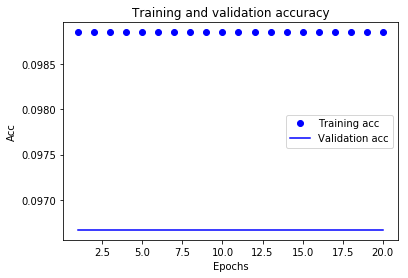

In [272]:
plot_acc_fn(history_rl_chal)

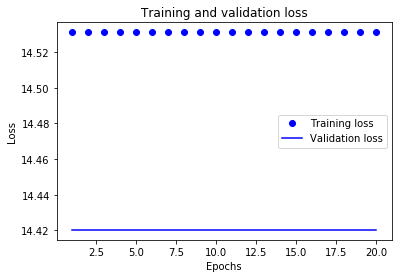

In [239]:
plot_loss_fn(history_rl_chal)

<b>Disscuss</b> <br>it stuck at same accuracy and loss because all node have initial same weight therefore all node will have a same gadient and the weight couldn't be adjust (from equation of z = summation of weights from previous node) to have differnt value of weight from each node.